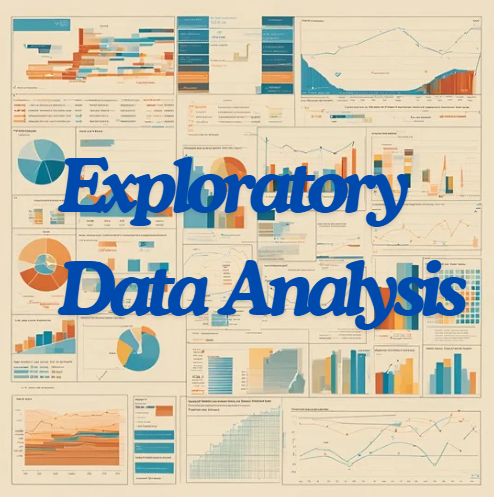

Question from Kaggle:

    1. Analysis of the gross of a movie vs directors.
    
    2. Analysis of the gross of a movie vs different - different stars.

    3. Analysis of the No_of_votes of a movie vs directors.

    4. Analysis of the No_of_votes of a movie vs different - different stars.

    5. Which actor prefer which Genre more?

    6. Which combination of actors are getting good IMDB_Rating maximum time?
    
    7. Which combination of actors are getting good gross?


# Table of content

1. Importing Libraries
2. Loading Data into DataFrame
3. Checking Data Types
4. Dropping Irrelevant Columns
5. Renaming Columns for Clarity
6. Data Cleaning
    1. Identifying and Removing Duplicates
    2. Handling Null Values
    3. Detecting and Addressing Outliers
7. Visualizing Data to find relationships: Patterns, trends, distributions, correlations of Data
8. Conclusion

# 1. Importing libraries

In [288]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
"""
enable the inline display of matplotlib plots directly within the notebook. 
This means that when you create a plot using matplotlib, 
it will be rendered as part of the notebook output, rather than in a separate window.
"""
sns.set(color_codes=True)
"""
Set Color Codes: 
    By enabling color_codes=True, you can use shorthand color codes (like 'b' for blue,
    'g' for green, etc.) in your plots, making it easier to specify colors 
     without needing to define them in full.
Enhance Aesthetics: 
    This command applies a default theme to your plots, improving their overall appearance
    and making them more visually appealing.
"""

# Set the float format to suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# 2. Loading data into DataFrame

In [289]:
# load the data
df = pd.read_csv(r"G:\我的雲端硬碟\Coding\GitHub\IMDb-Movies-Analysis\imdb_top_1000.csv")

# display the top 5 rows
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# 3. Checking data types


In [290]:
# check the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Gross and Runtime: object to int/float



In [291]:
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(float)

df['Runtime'] = df['Runtime'].str.replace(" min", "")
df["Runtime"] = df["Runtime"].astype(int)

# 4. Dropping irrelevant columns

In [292]:
# drop the irrelavant columns: Poster Link & Overview
df = df.drop(['Poster_Link', 'Overview'], axis=1)
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.00
1,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00
4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.60,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0.00
996,Giant,1956,G,201,"Drama, Western",7.60,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0.00
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.60,85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.00
998,Lifeboat,1944,NaN,97,"Drama, War",7.60,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0.00


# 5. Renaming columns

In [293]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'Rank'}, inplace=True)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1000 non-null   int64  
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.3+ KB


# 6. Data cleaning

1. Duplicates

In [295]:
# find any duplicated
df[df.duplicated()]

,Rank,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


2. Null values

In [296]:
print("No of data: " + str(df.shape[0]))
threshold = len(df) * 0.05
print(threshold)

No of data: 1000
50.0


In [297]:
df.isnull().sum()

Rank               0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

3 cols have null values and greater than the threshold.
    
    X Dropping them
    
    V Imputation

In [298]:
df.describe()

,Rank,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.00,1000.00,1000.00,843.00,1000.00,1000.00
mean,499.50,122.89,7.95,77.97,273692.91,56536877.98
std,288.82,28.09,0.28,12.38,327372.70,103238179.48
min,0.00,45.00,7.60,28.00,25088.00,0.00
25%,249.75,103.00,7.70,70.00,55526.25,445709.75
50%,499.50,119.00,7.90,79.00,138548.50,10702751.50
75%,749.25,137.00,8.10,87.00,374161.25,61539891.25
max,999.00,321.00,9.30,100.00,2343110.00,936662225.00


<Axes: >

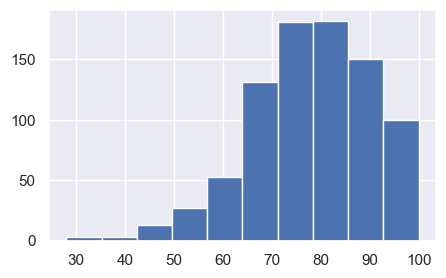

In [299]:
df['Meta_score'].hist(bins=10, figsize=(5, 3))

<Axes: >

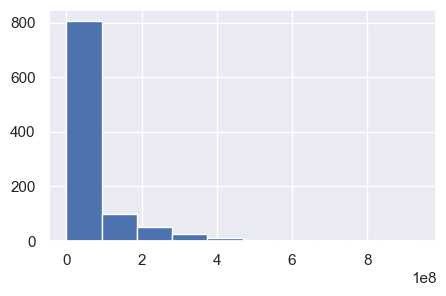

In [300]:
df['Gross'].hist(bins=10, figsize=(5, 3))

In [301]:
# From online: because the most movies is "U" (General Viewing for all ages)
df['Certificate'].fillna('U',inplace=True)

# Since the data is skewed, mean is less sensitive to outliers
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

# Since the data is skewed, mean is less sensitive to outliers
df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())

C:\Users\Wai\AppData\Local\Temp\ipykernel_25896\478359210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('U',inplace=True)
C:\Users\Wai\AppData\Local\Temp\ipykernel_25896\478359210.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [302]:
df.isnull().sum()

Rank             0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [303]:
df.describe().columns

Index(['Rank', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'], dtype='object')

In [304]:
cols = ['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

def find_outliers(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 找到異常值的索引
    outlier_indices = df[(df[x] < lower_bound) | (df[x] > upper_bound)].index
    
    return outlier_indices

# 用於存儲不重複的異常值的 Series_Title 和 Rank
outliers = set()

for col in cols:
    outlier_indices = find_outliers(col)
    # 將異常值的 Series_Title 和 Rank 添加到集合中
    for index in outlier_indices:
        # series_title = df.loc[index, 'Series_Title']
        rank = int(df.loc[index, 'Rank'])  # 將 np.int64 轉換為 int
        outliers.add(rank)

# 將集合轉換為列表並排序
outliers = sorted(outliers)

# print("所有不重複的異常值的 Series_Title 和 Rank:")
# for item in outliers:
#     print(item)

In [305]:
print(len(outliers))

209


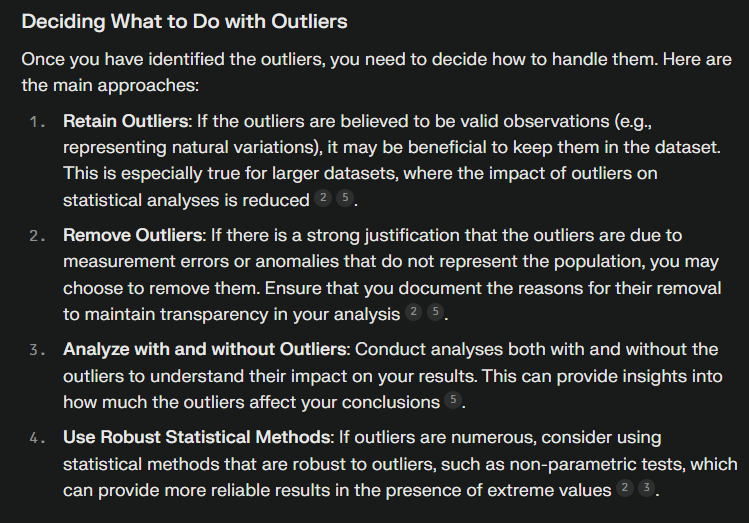

20.9% outliers is large.
<!-- We may separate 2 different DataFrame to analyze it. -->

Since the outliers are valid observations. They are retailed.

In [306]:
# df_no_out = df[~df['Rank'].isin(outliers)]
# print(len(df_no_out))

# 7. Visualizing data

In [307]:
df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

Genre
Animation, Drama, War        8.50
Action, Sci-Fi               8.40
Drama, Musical               8.40
Drama, Mystery, War          8.35
Western                      8.35
                             ... 
Action, Adventure, Mystery   7.60
Action, Adventure, Family    7.60
Action, Adventure, Crime     7.60
Animation, Drama, Romance    7.60
Drama, War, Western          7.60
Name: IMDB_Rating, Length: 202, dtype: float64

Distribution of Movie Runtimes

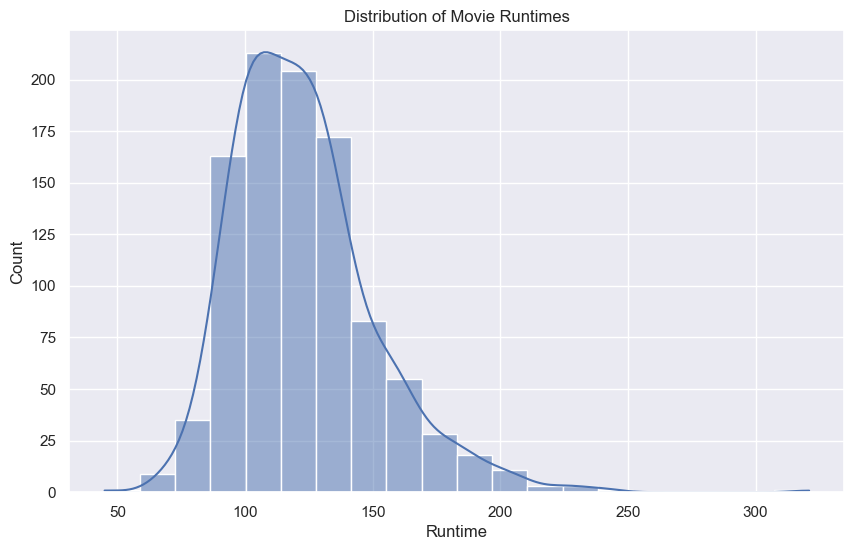

In [308]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime'], bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.show()

Distribution of Certificate

<Axes: xlabel='count', ylabel='Certificate'>

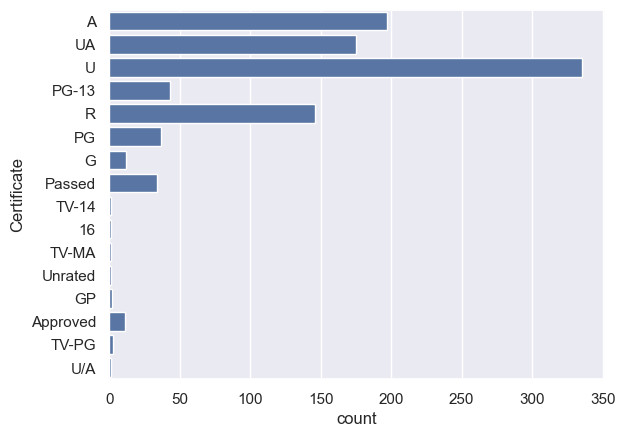

In [309]:
sns.countplot(data=df['Certificate'])

Most movies was 'U' certificate i.e. General Viewing for all ages.

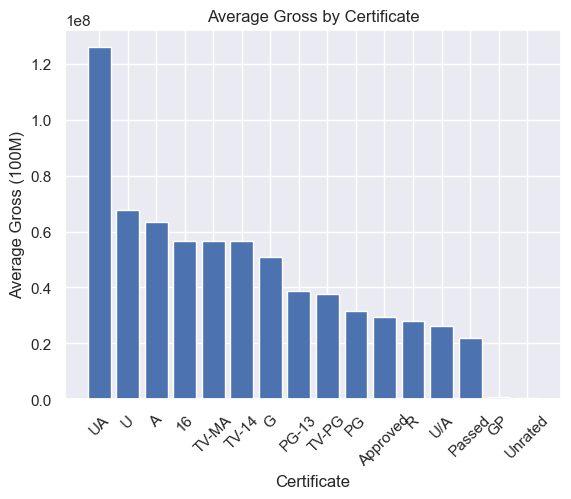

In [310]:
data = df.groupby('Certificate')['Gross'].mean().sort_values(ascending=False).reset_index()

plt.bar(data['Certificate'], data['Gross'])
plt.xlabel('Certificate') 
plt.ylabel('Average Gross (100M)')
plt.title('Average Gross by Certificate')
plt.xticks(rotation=45)
plt.show()

Top 10 Directors with Most Movies:

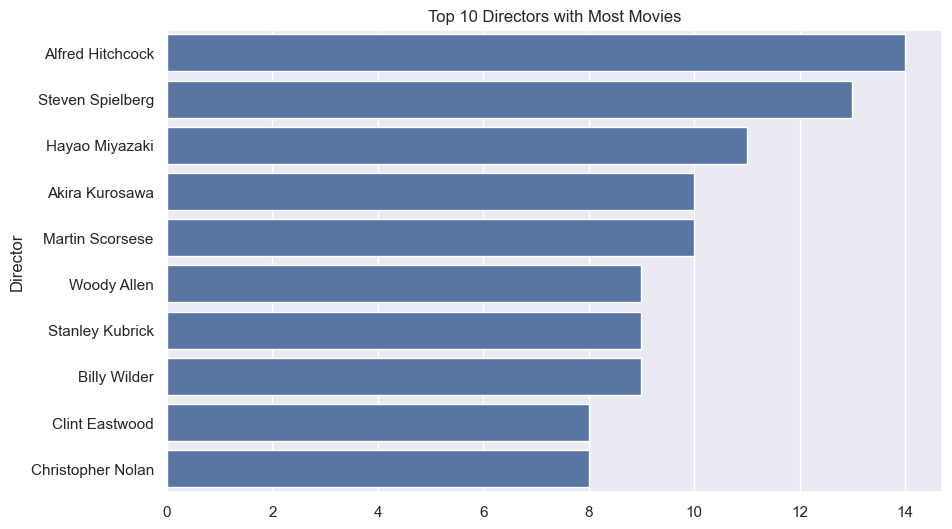

In [311]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Movies')
plt.show()

Gross Revenue VS IMDB

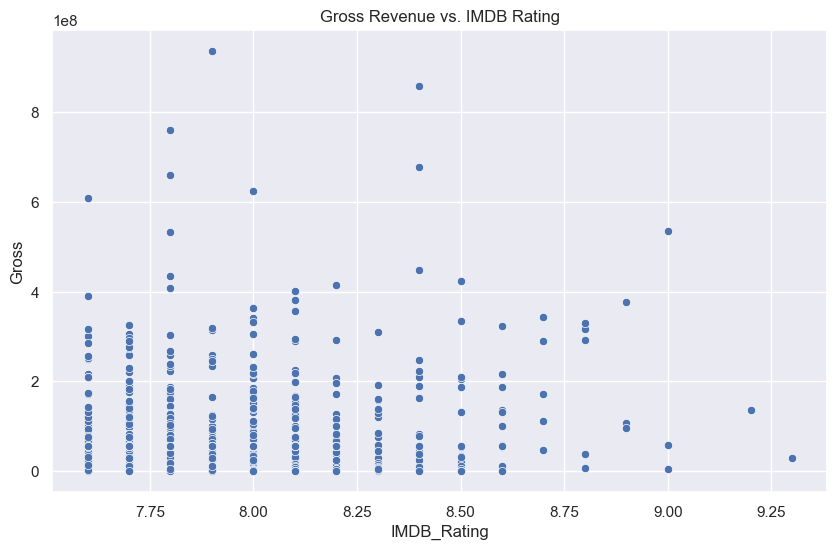

In [312]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df)
plt.title('Gross Revenue vs. IMDB Rating')
plt.show()

Movies per Genre

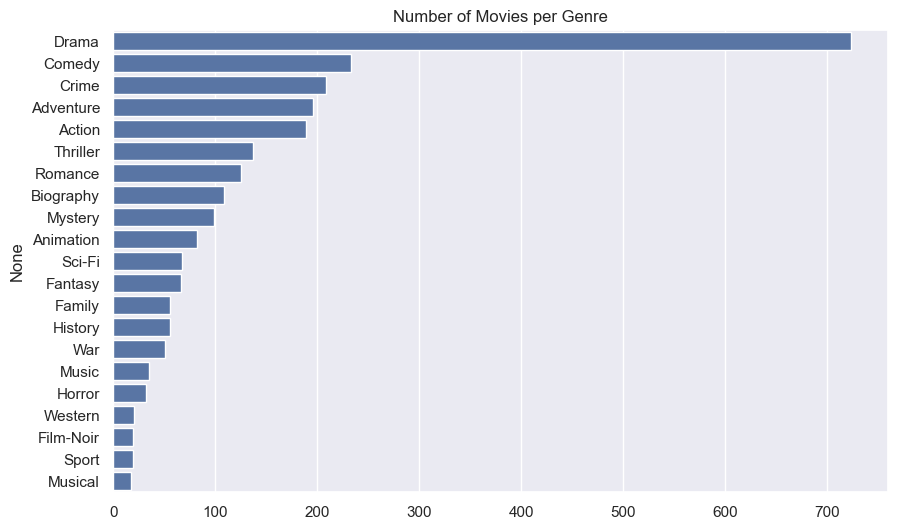

In [313]:
genre = df["Genre"].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=genre.values,y=genre.index)
plt.title("Number of Movies per Genre")
plt.show()

Top Actors Appearing in Movies:

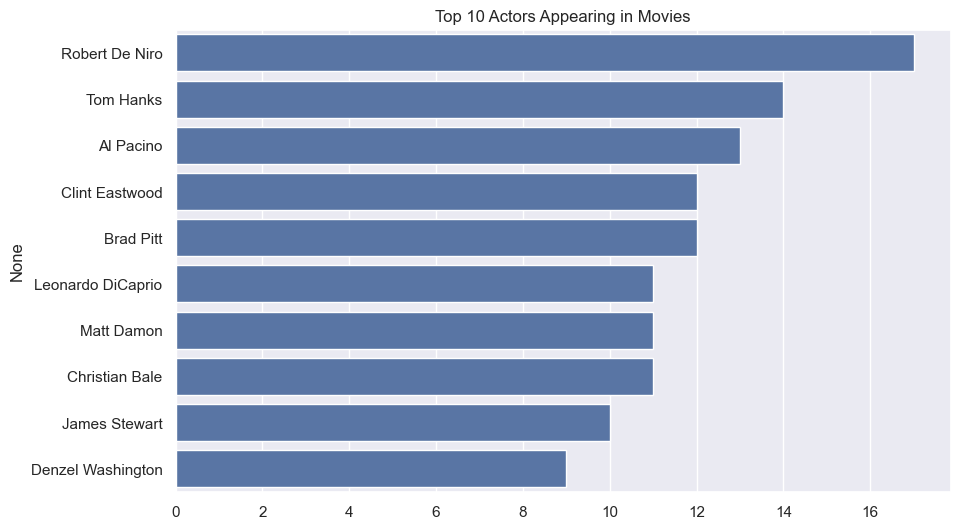

In [314]:
actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=actors.values, y=actors.index)
plt.title('Top 10 Actors Appearing in Movies')
plt.show()

Correlations

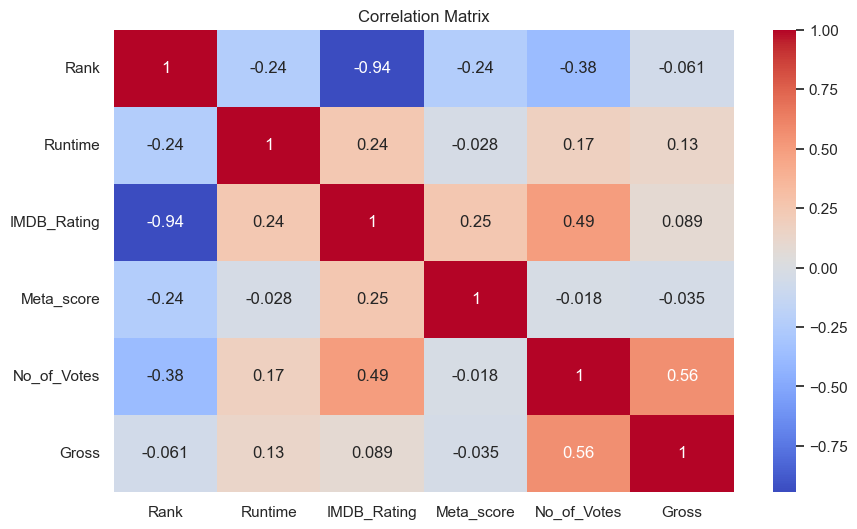

In [315]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

A correlation value of 0.56 indicates a moderate positive correlation between two variables. This means that as one variable increases, the other variable tends to also increase, but not perfectly. (from GPT)

We can see the No_of_Votes is quite positively related to the Gross

# 8. Conclusion